In [3]:
# Import Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
stories_df = pd.read_csv("readystories.csv")
stories_df.head()

In [ ]:
#Make sure all rows are filled
stories_df.count()

In [ ]:
#Top Genres
stories_df["genre"].value_counts()

# Distribution of stories by genre

In [7]:
genre_grp = stories_df.groupby("genre", as_index=False)
stories_by_category = genre_grp.count()
stories_by_category

,genre,Unnamed: 0,id,title,length,voteCount,readCount,commentCount,user,categories,tags,mature,url,numParts,parts
0,Action,7,7,7,7,7,7,7,7,7,7,7,7,7,7
1,Adventure,4,4,4,4,4,4,4,4,4,4,4,4,4,4
2,ChickLit,1,1,1,1,1,1,1,1,1,1,1,1,1,1
3,Fanfiction,5,5,5,5,5,5,5,5,5,5,5,5,5,5
4,Fantasy,50,50,50,50,50,50,50,50,50,50,50,50,50,50
5,General Fiction,7,7,7,7,7,7,7,7,7,7,7,7,7,7
6,Historical Fiction,13,13,13,13,13,13,13,13,13,13,13,13,13,13
7,Horror,8,8,8,8,8,8,8,8,8,8,8,8,8,8
8,Humor,1,1,1,1,1,1,1,1,1,1,1,1,1,1
9,Mystery / Thriller,21,21,21,21,21,21,21,21,21,21,21,21,21,21


In [8]:
font={'family': 'arial',
        'color':  'black',
        'weight': 'bold',
        'size': 14,
        }

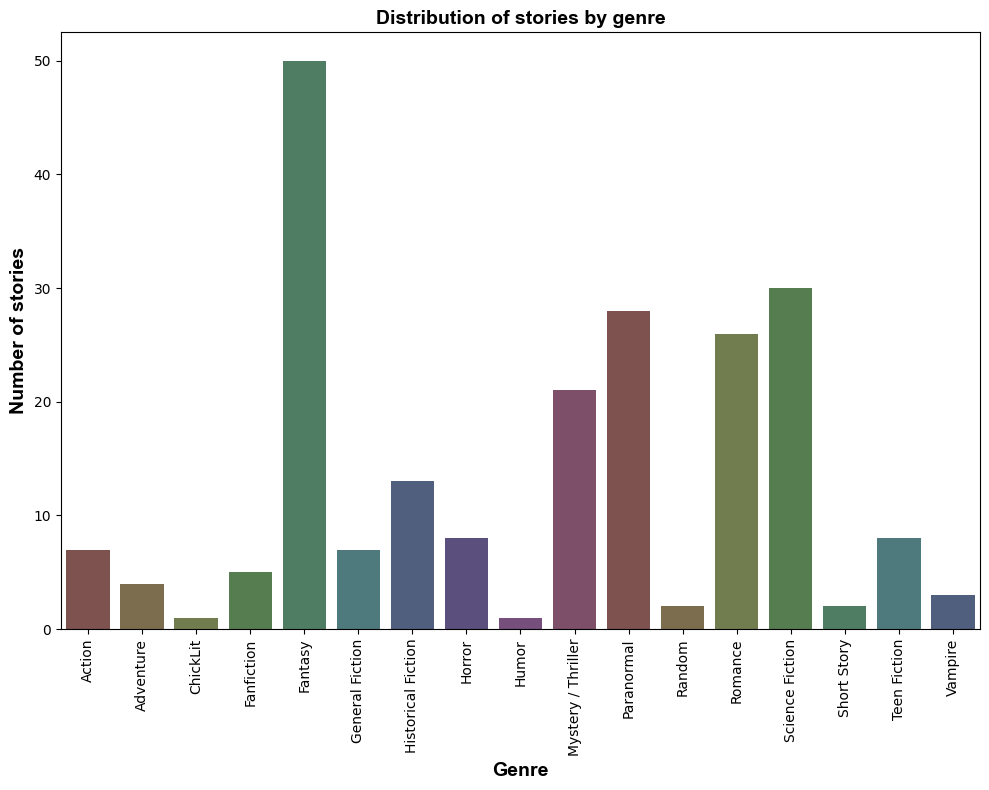

In [12]:
# create a bar plot
plt.figure(figsize=(10,8))

sns.barplot(x=stories_by_category["genre"], y=stories_by_category["id"], data=stories_by_category, palette=sns.hls_palette(10, l=.4, s=.3), label="Stories by Category")

# set plot properties
plt.title("Distribution of stories by genre", fontdict=font)
plt.ylabel("Number of stories", fontdict=font)
plt.xlabel("Genre", fontdict=font)
plt.xticks(rotation="vertical")
plt.tight_layout()
# plot and save
plt.savefig("Images/dist_genre_bar.png")
plt.show()

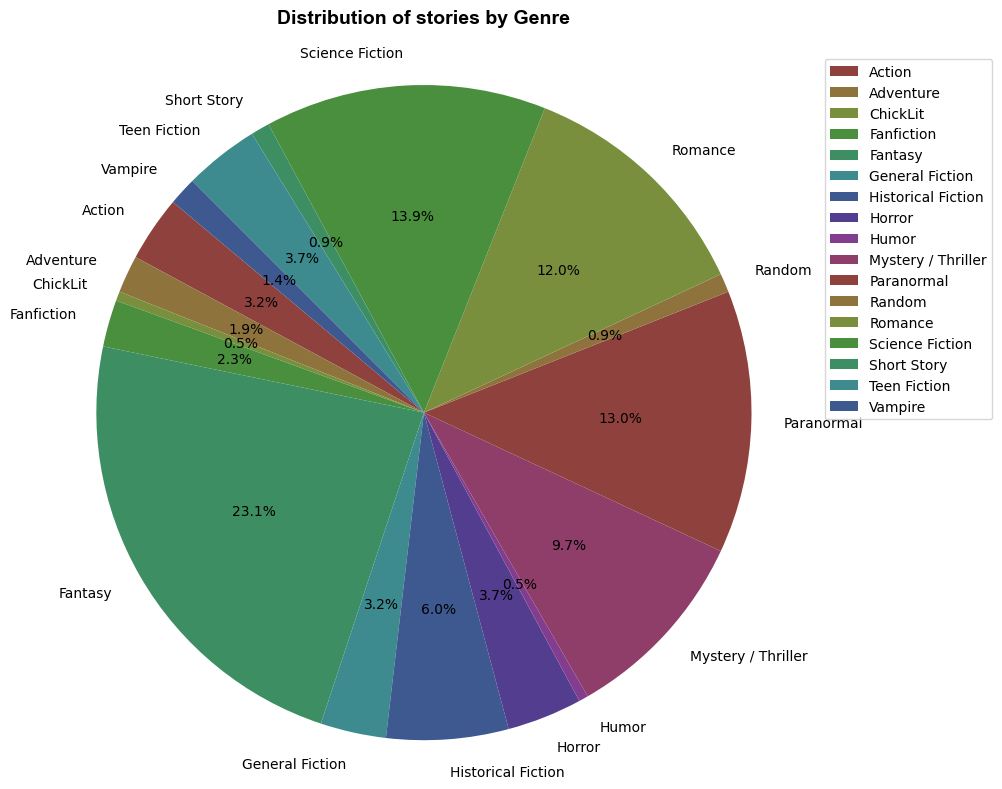

In [15]:
# create pie chart
plt.figure(1, figsize=(10,8 ))

patches, texts, autotexts = plt.pie(stories_by_category["id"], 
                                    labels=stories_by_category["genre"], 
                                    colors=sns.hls_palette(10, l=.4, s=.4),
                                    autopct='%1.1f%%', startangle=140)

# set plot properties
plt.legend(patches, stories_by_category["genre"], loc="best", bbox_to_anchor=(1.2,1))
plt.axis('equal')
plt.title("Distribution of stories by Genre\n", fontdict=font)
plt.tight_layout()
# plot and save
plt.savefig("Images/dist_genre_pie.png")
plt.show()

# Popularity of stories by category
## Popularity of stories based on how many were read

In [9]:
popularity_df = genre_grp.count()
popularity_df.sort_values(by="voteCount", ascending=False)['voteCount']

4     50
13    30
10    28
12    26
9     21
6     13
15     8
7      8
0      7
5      7
3      5
1      4
16     3
11     2
14     2
2      1
8      1
Name: voteCount, dtype: int64

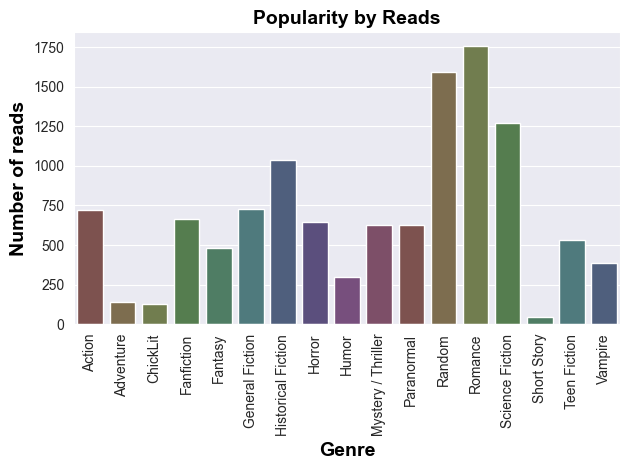

In [67]:
ax = sns.barplot(x=popularity_df["genre"], y=popularity_df["readCount"], data=popularity_df, 
                 palette=sns.hls_palette(10, l=.4, s=.3), label="Popularity by Reads")
plt.title("Popularity by Reads", fontdict=font)
plt.ylabel("Number of reads", fontdict=font)
plt.xlabel("Genre", fontdict=font)
plt.xticks(rotation="vertical")
plt.tight_layout()
plt.savefig("Images/popularity_genre_by_readCount.png")
plt.show()

## Popularity of stories based on Comments

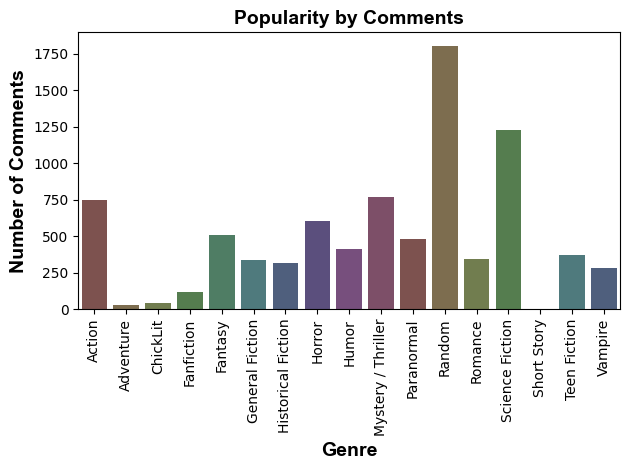

In [18]:
sns.barplot(x=popularity_df["genre"], y=popularity_df["commentCount"], data=popularity_df, 
            palette=sns.hls_palette(10, l=.4, s=.3), label="Popularity by Comments")
plt.title("Popularity by Comments", fontdict=font)
plt.ylabel("Number of Comments", fontdict=font)
plt.xlabel("Genre", fontdict=font)
plt.xticks(rotation="vertical")
plt.tight_layout()
plt.savefig("Images/popularity__genre_by_comments.png")
plt.show()

## Popularity of stories based on Votes

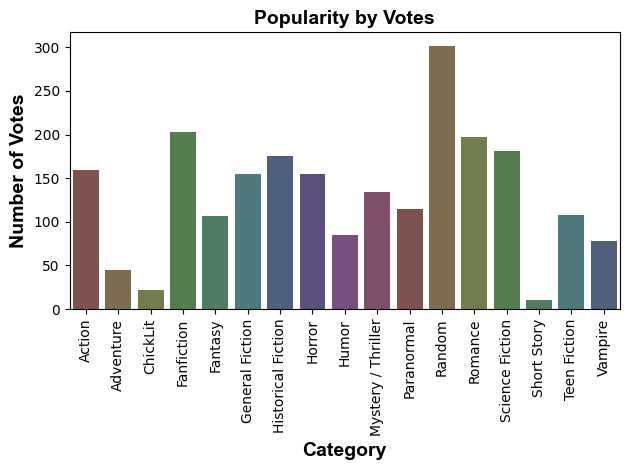

In [19]:
sns.barplot(x=popularity_df["genre"], y=popularity_df["voteCount"], data=popularity_df, 
            palette=sns.hls_palette(10, l=.4, s=.3), label="Popularity by Votes")
plt.title("Popularity by Votes", fontdict=font)
plt.ylabel("Number of Votes", fontdict=font)
plt.xlabel("Category", fontdict=font)
plt.xticks(rotation="vertical")
plt.tight_layout()
plt.savefig("Images/popularity_genre_by_votes.png")
plt.show()

# Distribution of stories by tags

In [10]:
# Function to get the tags as a list from the tags columns
def get_tag_list(tag_str):
    tag_str = tag_str.strip("['")
    tag_str = tag_str.strip("']")
    tag_str = tag_str.strip("', '")
    tags = tag_str.split("', '")
    return tags

# get all the tags from the stories and get the top 10 popular tags
all_tags = []
for index,row in stories_df.iterrows():
    tag = row["tags"]
    all_tags += get_tag_list(tag)

tags_df = pd.DataFrame({"tag": all_tags})
tags_counts = pd.DataFrame(tags_df["tag"].value_counts())
popular_tags = tags_counts.iloc[0:25, :]

popular_tags.reset_index(inplace=True)
popular_tags = popular_tags.rename(columns={"tag":"count","index":"tag"})
popular_tags

,tag,count
0,onc2023,191
1,opennovellacontest,89
2,opennovellacontest2023,88
3,romance,83
4,onc,73
5,fantasy,61
6,novella,47
7,mystery,38
8,paranormal,36
9,love,35


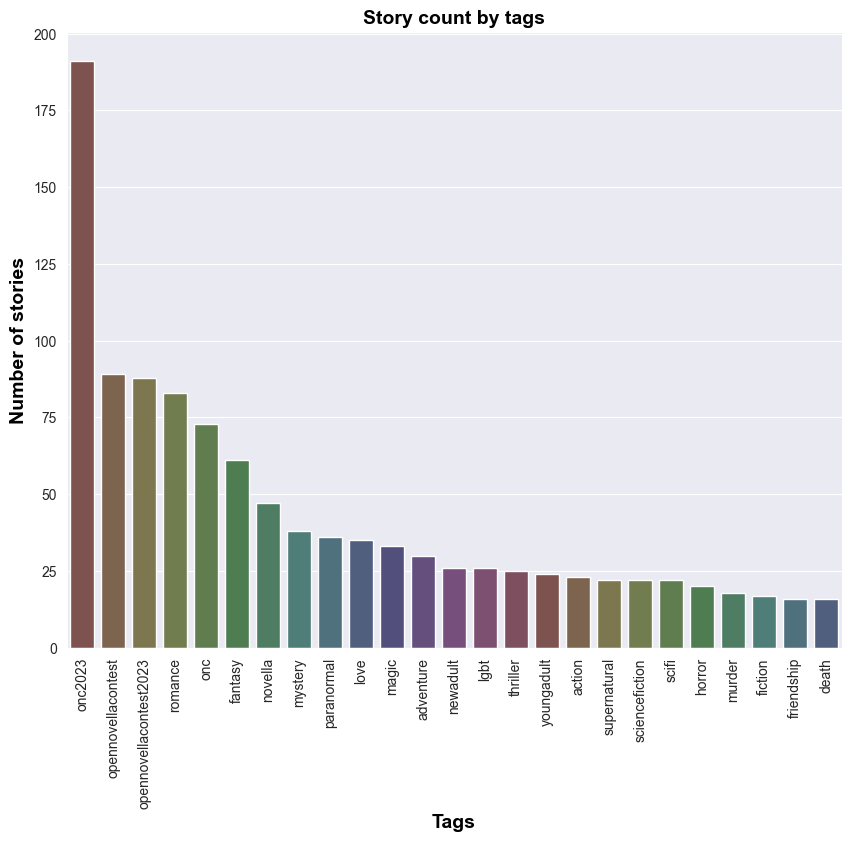

In [80]:
plt.figure(figsize=(10,8))
sns.barplot(x="tag", y="count", data=popular_tags, palette=sns.hls_palette(15, l=.4, s=.3))
plt.title("Story count by tags",fontdict=font)
plt.ylabel("Number of stories",fontdict=font)
plt.xlabel("Tags",fontdict=font)
plt.xticks(rotation="vertical")
plt.savefig("Images/tag_distribution_bar.png")
plt.show()

## Popularity of stories by tags

In [11]:
# Getting the vote count, comment count and read count by tags
tags_dict = {}
read_dict = {}
comment_dict = {}
vote_dict = {}

# Loop through the stories and add the counts for each tag of the story
for index,row in stories_df.iterrows():
    story_tags = row["tags"]
    read_count = row["readCount"]
    comment_count = row["commentCount"]
    vote_count = row["voteCount"]
    
    # For each story, loop through the tags and see which one matches the tags list.
    for tag_index, tag_row in popular_tags.iterrows():
        tag_name = tag_row["tag"]
        if tag_name in get_tag_list(story_tags):
            if tag_name in tags_dict.keys():
                tags_dict[tag_name] += 1
                read_dict[tag_name] += read_count
                comment_dict[tag_name] += comment_count
                vote_dict[tag_name] += vote_count
            else:
                tags_dict[tag_name] = 1
                read_dict[tag_name] = read_count
                comment_dict[tag_name] = comment_count
                vote_dict[tag_name] = vote_count

# create data frame for all types of counts
# vote counts
vote_df = pd.DataFrame({"tag": list(vote_dict.keys()),
                       "votes": list(vote_dict.values()) })

# comment counts
comment_df = pd.DataFrame({"tag": list(comment_dict.keys()),
                       "comments": list(comment_dict.values())})

# comment counts
reads_df = pd.DataFrame({"tag": list(read_dict.keys()),
                       "reads": list(read_dict.values())})

## Popularity of stories by tags, using the vote count

In [15]:
comment_df.sort_values(by="comments", ascending=False)

,tag,comments
0,onc2023,113341
5,romance,63689
4,opennovellacontest,51121
11,opennovellacontest2023,48024
6,fantasy,42480
12,onc,40283
19,adventure,35028
1,mystery,31197
10,scifi,30175
9,novella,29586


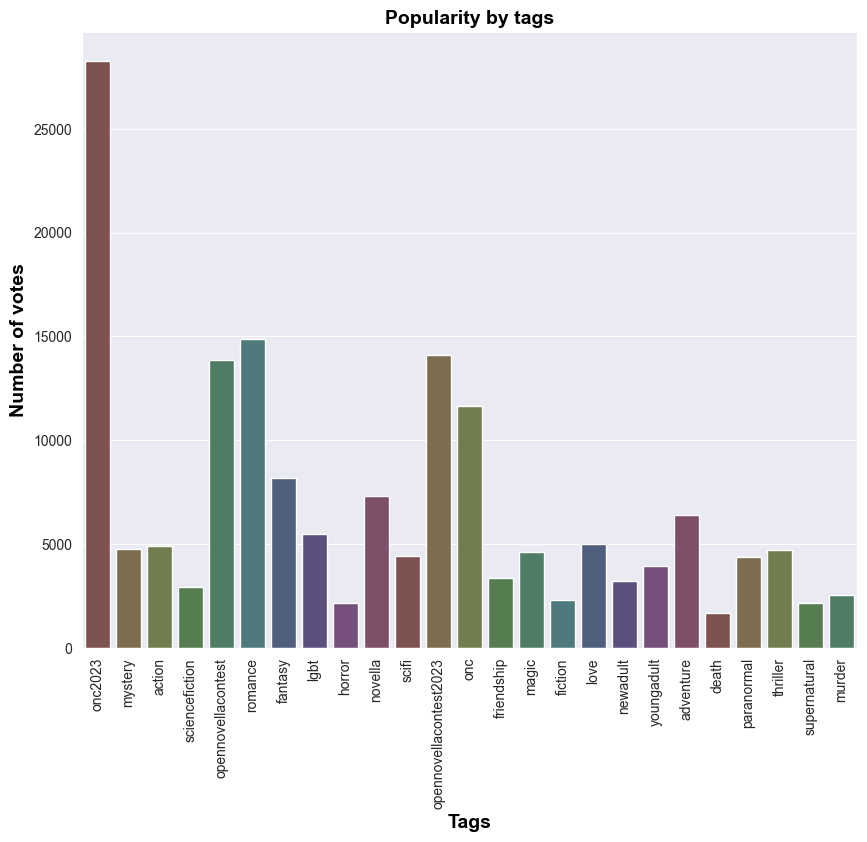

In [94]:
plt.figure(figsize=(10,8))

sns.barplot(x="tag", y="votes", data=vote_df, palette=sns.hls_palette(10, l=.4, s=.3))
plt.title("Popularity by tags",fontdict=font)
plt.ylabel("Number of votes",fontdict=font)
plt.xlabel("Tags",fontdict=font)
plt.xticks(rotation="vertical")
plt.savefig("Images/popularity_tags_by_votes.png")
plt.show()

## Popularity of stories by tags, using the comment count

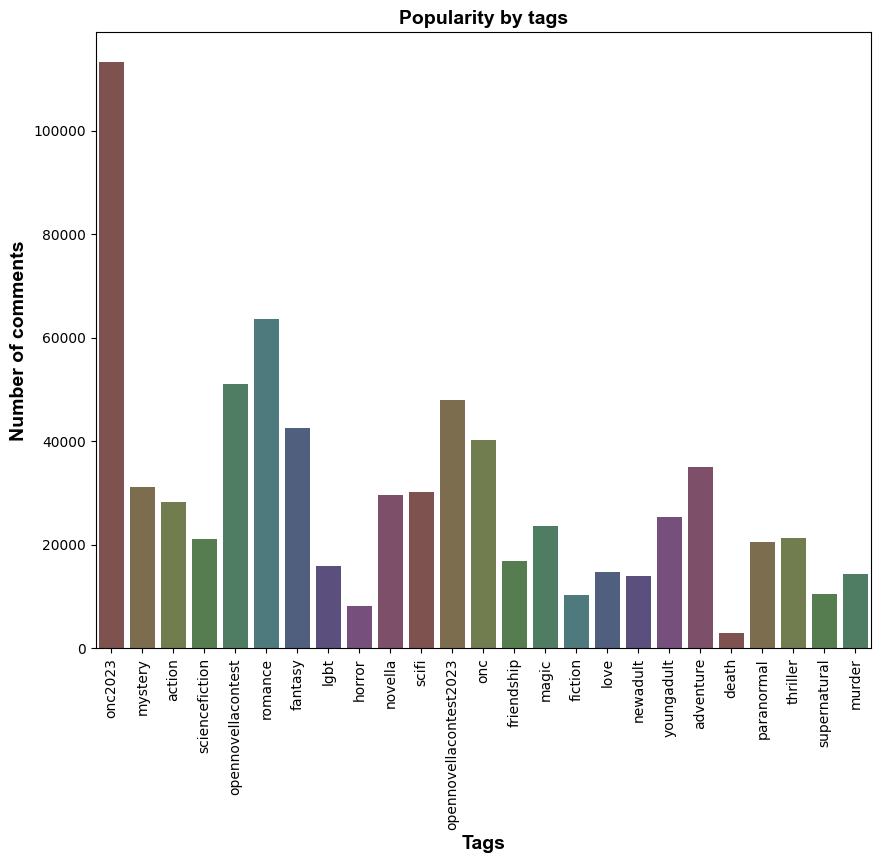

In [16]:
plt.figure(figsize=(10,8))

sns.barplot(x="tag", y="comments", data=comment_df, palette=sns.hls_palette(10, l=.4, s=.3))
plt.title("Popularity by tags",fontdict=font)
plt.ylabel("Number of comments",fontdict=font)
plt.xlabel("Tags",fontdict=font)
plt.xticks(rotation="vertical")
plt.savefig("Images/popularity_tags_by_comments.png")
plt.show()

## Popularity of stories by tags, using the read count

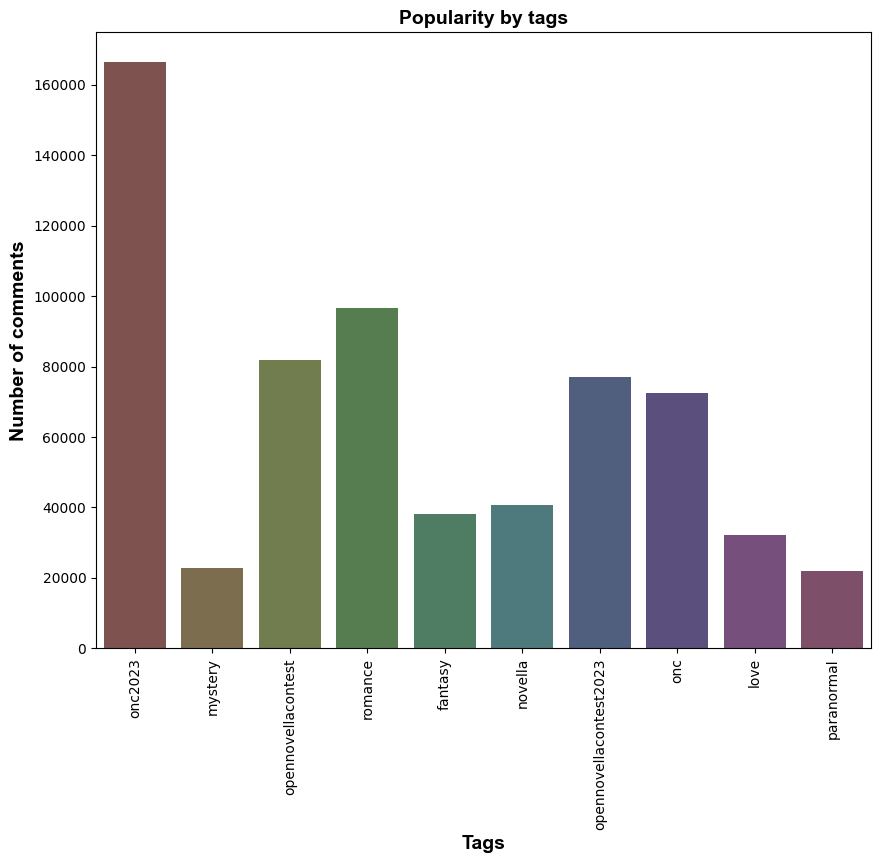

In [25]:
plt.figure(figsize=(10,8))

sns.barplot(x="tag", y="reads", data=reads_df, palette=sns.hls_palette(10, l=.4, s=.3))
plt.title("Popularity by tags",fontdict=font)
plt.ylabel("Number of comments",fontdict=font)
plt.xlabel("Tags",fontdict=font)
plt.xticks(rotation="vertical")
plt.savefig("Images/popularity_tags_by_reads.png")
plt.show()

# Plots for the following research questions:

+ Average number of parts per story (for completed stories)?
+ Does length of read count correlate to a certain story length? Does read count correlate to number of parts per story?

## Average  Number of Chapters

In [18]:
plotdf=pd.read_csv('readystories.csv')

In [19]:

avgnumparts=round(plotdf["numParts"].mean())
avgnumwords=round((plotdf["length"].mean()))
output=pd.DataFrame({
                     "Average Number of Chapters":avgnumparts,
                    "Average Number of Characters":avgnumwords},index=[0])
output

,Average Number of Chapters,Average Number of Characters
0,18,156814


Characters to Words leaves an average of 24125 - 31363 words

## Number of Chapters vs Popularity (Vote Count)

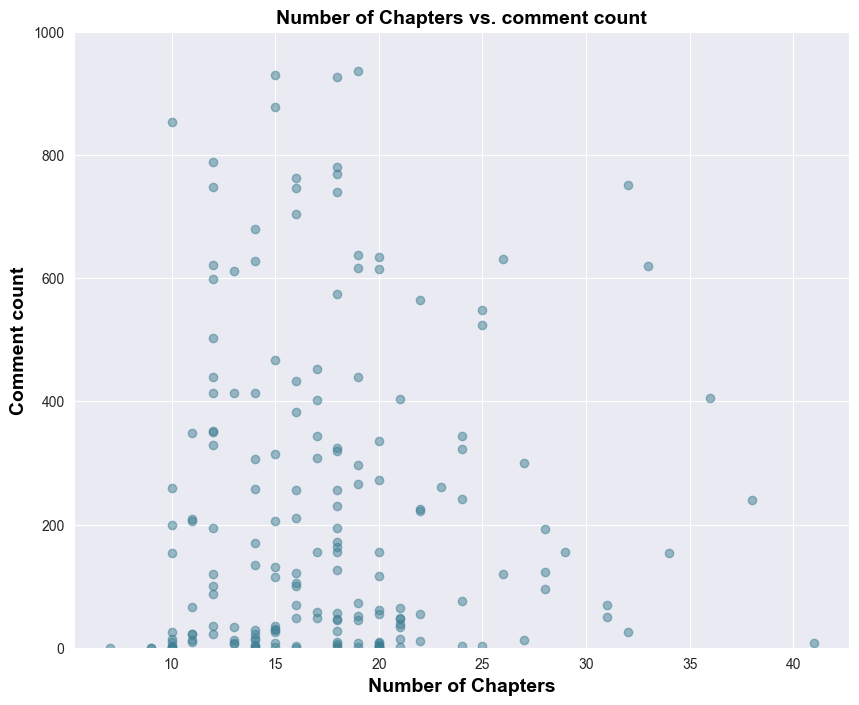

In [22]:
plt.figure(figsize=(10,8))
sns.set_style("darkgrid")
plt.scatter(plotdf["numParts"],plotdf["commentCount"],alpha=.5,color=sns.diverging_palette(220, 20, n=1))
plt.title("Number of Chapters vs. comment count",fontdict=font)
plt.xlabel("Number of Chapters",fontdict=font)
plt.ylabel("Comment count",fontdict=font)
plt.ylim(0,1000)
plt.savefig("Images/popularity_chapters_by_comments.png")
plt.show()